In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv, matplotlib
from scipy.optimize import curve_fit
from scipy.stats import linregress
from read_dat import read_dat
from scipy.signal import savgol_filter
import uncertainties as un
from matplotlib import colors
%matplotlib widget
matplotlib.rcParams.update({
    'figure.figsize': (13,9),
    'font.size': 18
})

In [2]:
start = -40
long = 1000
short = 80
baseline = 200

filename = '20230802_2_cs'

dat_file = read_dat(f'{filename}.dat', align_method='CFD', t_start=start, t_long=long, t_short=short, baseline_samples=baseline)

init complete


In [3]:
# dat_file.lst_out(events=False, ch=[0,1], output=[[1,1,0,0,0],[1,1,0,0,0]])
dat_file.lst_out_geometric_mean(events=100, ch=[0,1], output=[[1,1,0,0,0],[1,1,0,0,0]], out_geo=[1,1,0,0,0])


1000 events
2000 events
3000 events
4000 events
5000 events
6000 events
7000 events
8000 events
9000 events
10000 events
11000 events
12000 events
13000 events
14000 events
15000 events
16000 events
17000 events
18000 events
19000 events
20000 events
21000 events
22000 events
23000 events
24000 events
25000 events
26000 events
27000 events
28000 events
29000 events
30000 events
31000 events
32000 events
33000 events
34000 events
35000 events
36000 events
37000 events
38000 events
39000 events
40000 events
41000 events
42000 events
43000 events
44000 events
45000 events
46000 events
47000 events
48000 events
49000 events
50000 events
51000 events
52000 events
53000 events
54000 events
End reading


0
(array([0.43843426, 1.45746582, 1.45360364, ..., 6.4574975 , 6.44920359,
       3.43848719]), 35802.082625621944, 0.41092370806876466, 25916.424, 1681.5318389584763, 356.9460245465459)
(220.0, 280.0, 740.0, 240)
(220.0, 280.0, 740.0, 240)


/tmp/ipykernel_245772/2697872785.py:6: RuntimeWarning: invalid value encountered in sqrt
  trace_geo_mean = np.sqrt(trace_0 * trace_1)


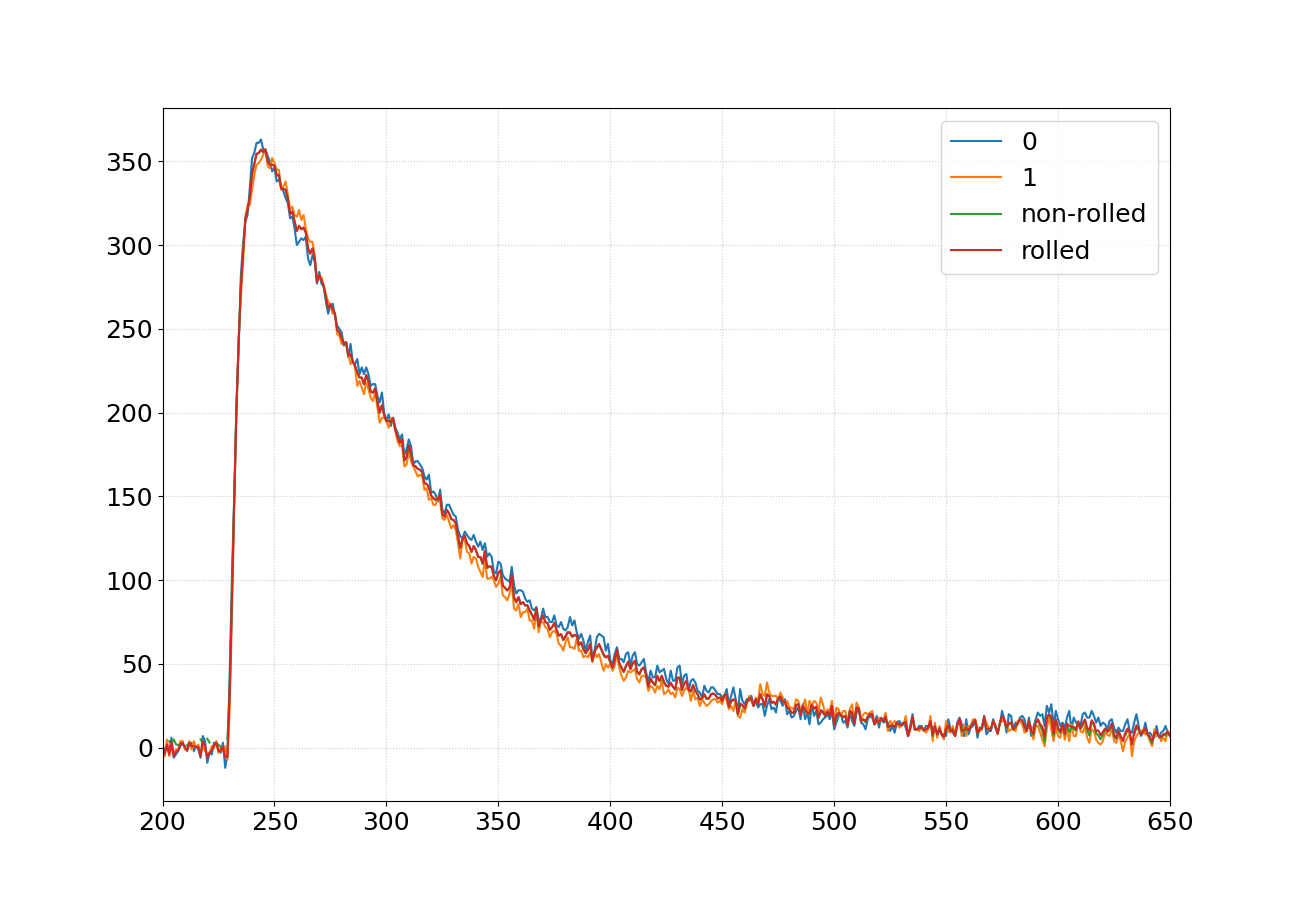

In [4]:
ev = dat_file.read_event()

trace_0 = ev[0].get_trace()
trace_1 = ev[1].get_trace()

trace_geo_mean = np.sqrt(trace_0 * trace_1)

ev_geo_mean = ev[0].get_geometric_mean_trace(np.array([trace_0+ev[0].get_baseline(), trace_1+ev[1].get_baseline()]))

print(ev_geo_mean)
times_0 = ev[0].get_times()
times_1 = ev[1].get_times()

print(times_0)
print(times_1)

plt.figure()

plt.plot(trace_0, label='0')
plt.plot(trace_1, label='1')
# plt.plot(np.roll(trace_1, -1))

# plt.plot(ev_geo_mean[1][1], label='rolled')

# plt.axvline(times_0[3], color='r', label='0')
# plt.axvline(times_1[3], color='b', label='1')

plt.plot(trace_geo_mean, label='non-rolled')
plt.plot(ev_geo_mean[0], label='rolled')

plt.legend()
plt.xlim(200, 650)
# plt.ylim(-20,20)
plt.grid(color='#CCCCCC', linestyle=':')
plt.show()

In [2]:
L=[[],[]]
S=[[],[]]
t0 = time()
evs = []
for i in range(5000):
    ev = file.read_event()
    evs.append(ev)
    # for j in range(len(ev)): #per channel
    #     S[j].append(ev[j].get_pulse_shape())
    #     L[j].append(ev[j].get_long_integral())

t1 = time()
print(f'Time taken: {t1-t0}')

"""
time for just reading in events: 15.750966548919678
time for reading in events and saving L and S: 16.539798498153687

"""

Time taken: 158.8719036579132


'\ntime for just reading in events: 15.750966548919678\ntime for reading in events and saving L and S: 16.539798498153687\n\n'

In [2]:
L=[[],[]]
S=[[],[]]
for i in range(500):#read 500 events
	event = file.read_event()
	for j in range(len(event)): #per channel
		S[j].append(event[j].get_pulse_shape())
		L[j].append(event[j].get_long_integral())

In [3]:
%matplotlib tk
file.add_selections(L[0], S[0], mode='m')
# file.add_selections(mode='p', file='test_cuts_2.csv')

Begin selection for cut 1
4158.266129032256 0.649891774891775
45236.895161290304 0.7743506493506495
45362.90322580643 0.9583333333333334
1386.0887096774186 0.9556277056277057
1386.0887096774186 0.7202380952380953
End selection
Polygons Created


In [5]:
cut_L, cut_S = file.select_events(L[0], S[0], cut_id=[0, 1], inc=[1, -1], visual=True)

In [3]:
# file.lst_out(1000, [0], True, False, filename='lst_out.csv')
file.lst_out(1000, [0], True, False, cuts=[0, 2], inc=[1, 1], filename='cut_lst_out.csv')

1000 events
End reading


In [4]:
csv_in = np.genfromtxt('cut_lst_out.csv', delimiter=',', skip_header=2)

In [5]:
L = csv_in[...,0]
S = csv_in[...,1]

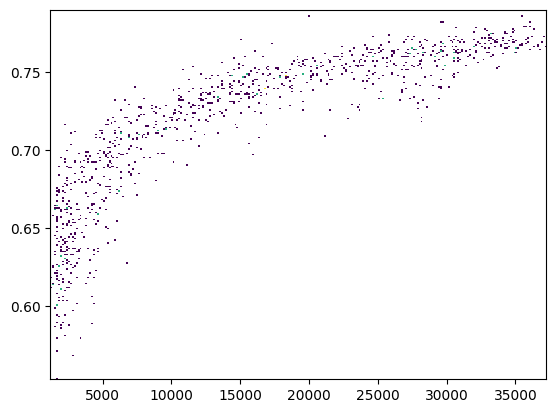

In [6]:
plt.hist2d(L, S, [256,256], norm=colors.LogNorm(vmin=1))
plt.show()

In [2]:
t0 = time()
for i in range(100):
    ev = file.read_event()
t1 = time()

print(t1-t0)

# 1.8332114219665527 <-- previous method

1.8332114219665527


In [4]:
f = open('../STNG.dat', 'rb')
header = f.read(72)
pream = f.read(280)
f.close()

print(np.frombuffer(pream, dtype=np.uint32))

[   6016      31       0       3       0 2508037    1500    1500       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0]
